# Dataset Titanic

El dataset del Titanic, es un conjunto de datos clásico utilizado para tareas de clasificación binaria. Se basa en información histórica de los pasajeros del RMS Titanic, que se hundió en 1912 tras chocar con un iceberg. El objetivo principal es predecir si un pasajero sobrevivió o no, basado en características como su clase social, edad, género y otros factores socioeconómicos.

El RMS Titanic se hundió el 15 de abril de 1912 durante su viaje inaugural. De las aproximadamente 2,224
personas a bordo, más de 1,500 murieron, convirtiendo este evento en uno de los naufragios más mortíferos en tiempos de paz.

| **Atributo** |                         **Descripción**                          |
| :----------: | :--------------------------------------------------------------: |
| PassengerId  |                 Identificador único del pasajero                 |
|   Survived   | Variable objetivo: Indica si el pasajero sobrevivió (1) o no (0) |
|    Pclass    |        Clase del ticket (proxy de estatus socioeconómico)        |
|     Name     | Nombre completo del pasajero, incluyendo títulos (ej. Mr., Mrs.) |
|     Sex      |                Género del pasajero (male, female)                |
|     Age      |          Edad en años (puede ser fraccional para niños)          |
|    SibSp     |                Número de hermanos/esposos a bordo                |
|    Parch     |                  Número de padres/hijos a bordo                  |
|    Ticket    |                        Número del ticket                         |
|     Fare     |                   Tarifa pagada por el ticket                    |
|    Cabin     |               Número de cabina (muchos faltantes)                |
|   Embarked   |                   Puerto de embarque (C, Q, S)                   |


In [95]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../../Datos/' # carpeta LOCAL donde se encuentran los datasets


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(DATOS_DIR + 'titanic.csv')

## Ejercicio 7

Realice las siguientes tareas para preparar el dataset para que pueda ser utilizado para entrenar modelos de redes neuronales.

### a) Visualice las primeras 5 filas y el resumen estadístico.

In [96]:
data.head()
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### b) Identifique los atributos (columnas) con valores nulos y su porcentaje.

In [97]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### c) Analizar los valores faltantes y discutir cuales serían las alternativas posibles para tratarlos.

##### Age 

Reemplazamos los valores nulos por la mediana/media

```python
data = data.replace(np.nan, {'Age': data['Age'].mean()})
```

##### Cabin

Reemplazamos los valores nulos por la moda

```python
cabinMode = data['Cabin'].mode()[0]
data = data.replace(np.nan, {'Cabin': cabinMode})
```

##### Embarked

Eliminar tuplas (por ser pocos)
```python
data = data.dropna(subset=['Embarked'])
```

### d) Los nombres de los pasajeros van acompañados de títulos que pueden ser importantes para la interpretación de los datos o para completar información faltante:

#### **i.** Extrae el título (como Mr, Miss, Mrs, Master, etc.) del nombre de cada pasajero y crea una nueva columna llamada Title.


In [98]:
data["Title"] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data["Name"] = data["Name"].str.replace('([A-Za-z]+)\.', '', regex=True)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_3780/1329149922.py:1: SyntaxWarning: invalid escape sequence '\.'
  data["Title"] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_3780/1329149922.py:2: SyntaxWarning: invalid escape sequence '\.'
  data["Name"] = data["Name"].str.replace('([A-Za-z]+)\.', '', regex=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### **ii.** Unifica los valores para que queden Mr, Miss (Mlle, Ms), Mrs (Mme), Master, Others (resto).

In [99]:
data["Title"] = data["Title"].replace(['Mlle', 'Ms'], 'Miss')
data["Title"] = data["Title"].replace('Mme', 'Mrs')
data["Title"] = data["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
									   'Don', 'Dr', 'Major', 'Rev', 'Sir',\
									   'Jonkheer', 'Dona'], 'Others')
print(data["Title"].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: count, dtype: int64


#### **iii.** Computa las edades faltantes utilizando la edad promedio por categoría.

In [100]:
# Para Age -> reemplazamos los valores nulos por la mediana
data = data.replace(np.nan, {'Age': data['Age'].mean()})
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


### e) Complete los valores faltantes utilizando las estrategias planteadas en los puntos anteriores.

In [101]:
# Para Cabin -> reemplazamos los valores nulos por la moda
cabinMode = data['Cabin'].mode()[0]
data = data.replace(np.nan, {'Cabin': cabinMode})

# Para Embarked -> eliminar tuplas (por ser pocos)
data = data.dropna(subset=['Embarked'])

print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


### f) Cree un nuevo atributo FamilySize que contabiliza los integrantes de familia a partir de los atributos SibSp (hermanos y esposo) y Parch (padres e hijos). No olvidar contar a la persona.

In [102]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,2
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,1
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,1


### g) Numerice los atributos categóricos: Sex, Embarked, y Title.

In [103]:
# Para sex lo 
NuevasColumnas = pd.get_dummies(data['Sex'], prefix= 'Sex', drop_first=True).astype(int)
data = pd.concat([NuevasColumnas, data], axis=1)
data.drop(['Sex'],axis=1, inplace=True)
data.head()

,Sex_male,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,1,0,3,"Braund, Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,2
1,0,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,0,3,1,3,"Heikkinen, Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,1
3,0,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,1,5,0,3,"Allen, William Henry",35.0,0,0,373450,8.0500,B96 B98,S,Mr,1


### h) Discuta y responda ¿Por qué one-hot encoding podría ser preferible a label encoding para el atributo Pclass?

Dado que Pclass es "Clase del ticket (proxy de estatus socioeconómico)", es decir, es la clase del pasaje comprado la cual es 1, 2 ó 3. Puesto que el atributo es ordinal puede pensarse que conviene usar el label encoding porque explicita el orden. Este orden es importante porque el objetivo del procesamiento de los datos es "El objetivo principal es predecir si un pasajero sobrevivió o no, basado en características como su clase social, ...", entonces tiene sentido la representación existente.

El problema viene cuando intentamos usar algunos algoritmos como el KNN, el cuál interpreta que 2 está a medio camino entre 1 y 3, lo que puede llevar a conclusiones erróneas. Cómo se puede ver al ejecutar `data["Pclass"].value_counts()` es que los valores más comunes son el 3 y el 1. Si estas personas murieron, puede que se concluya que las que más murieron son de la clase 2, lo cuál esta mal. Por ello, es conveniente utilizar one-hot encoding.

In [105]:
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

### i) Visualiza distribuciones: Histograma de Age, gráfico de barras para Survived por Sex y Pclass.

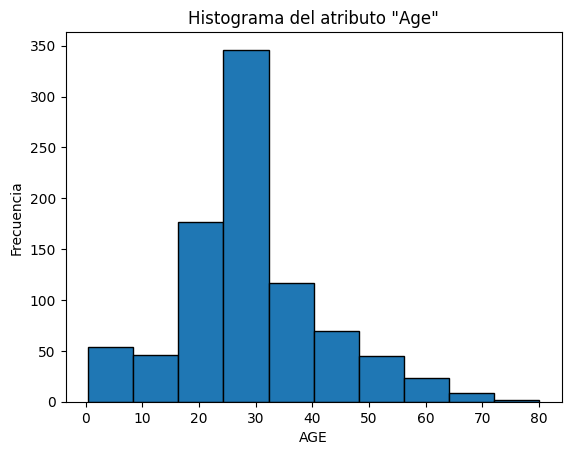

In [121]:
plt.figure()
plt.hist(data['Age'], bins = 10, edgecolor = 'black', \
         linewidth=1)
plt.xlabel('AGE')
plt.ylabel('Frecuencia')
plt.title('Histograma del atributo "Age"')
plt.show()

Sex_male
female    231
male      109
Name: count, dtype: int64


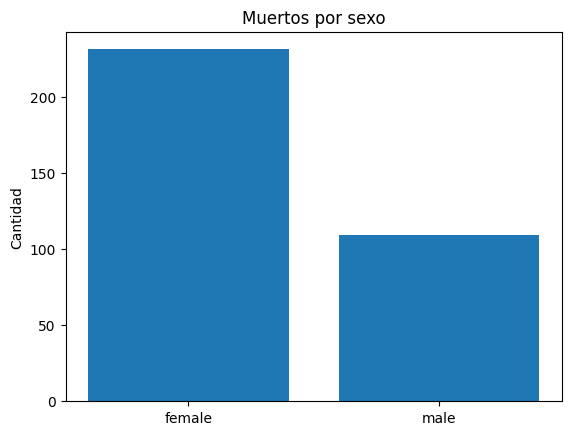

In [120]:
bars = data.loc[data["Survived"] == 1, "Sex_male"].value_counts()
bars = bars.rename(index={0: "female", 1: "male"})
print(bars)
plt.figure()
N = len(bars)
plt.bar(np.arange(N), bars)  	# Gráfico de bars
plt.title('Muertos por sexo')      			# Colocamos el título
plt.ylabel('Cantidad')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), bars.index)
plt.show()

Pclass
1    134
3    119
2     87
Name: count, dtype: int64


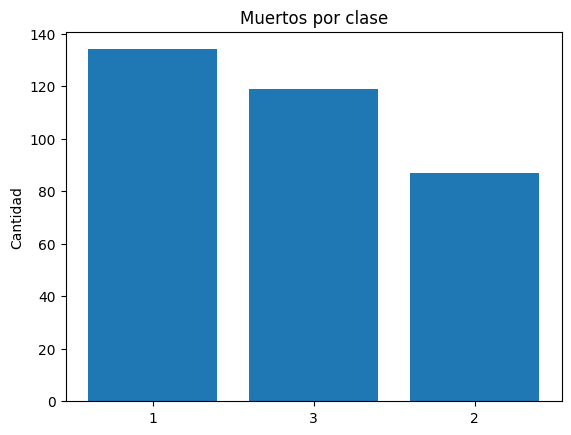

In [123]:
bars = data.loc[data["Survived"] == 1, "Pclass"].value_counts()
print(bars)
plt.figure()
N = len(bars)
plt.bar(np.arange(N), bars)  				# Gráfico de bars
plt.title('Muertos por clase')      			# Colocamos el título
plt.ylabel('Cantidad')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), bars.index)
plt.show()

## Ejercicio 8

Calcule la correlación lineal entre los atributos **“Fare”** (Tarifa) y **“PClass”** (clase del ticket). Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa). Explique el significado del valor de correlación obtenido.

<div style="display: flex; justify-content: center;">
  <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; text-align: center;">
    <thead>
      <tr>
	  	<th></th>
        <th style="background-color:#2E86C1; color:white;">Fare/PClass</th>
        <th style="background-color:#2E86C1; color:white;">PClass</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Valor</td>
        <td>0.5481932852366442</td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Intensidad</td>
        <td>débil</td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Tipo</td>
        <td>negativa</td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Significado</td>
        <td>A mayor clase, menor tarifa pagada. Es decir, las clases más altas son las de menor número.</td>
		<td></td>
      </tr>
    </tbody>
  </table>
</div>


In [124]:
corr = data["Fare"].corr(data["Pclass"], method="pearson")
print(corr)

-0.5481932852366442
